**Step 1: IMPORT LIBRARIES**

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


**Step 2: Load dataset**

In [2]:
df = pd.read_csv("hotel_bookings 2.csv")

**Step 3: EDA and Data Cleaning**

In [3]:
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [4]:
df.tail()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,6/9/2017
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,7/9/2017
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,7/9/2017
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,7/9/2017
119389,City Hotel,0,205,2017,August,35,29,2,7,2,...,No Deposit,9.0,NaN,0,Transient,151.20,0,2,Check-Out,7/9/2017


In [5]:
# number of rows and column present
df.shape

(119390, 32)

In [6]:
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

many columns we have...but we only need to check those columns that are related to our problem statement ie booking cancellation and reduce inn revenue

In [7]:
# columns we saw but we also need to check the datatype of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

reservation_status_date upon which we are going to do our analysis , but it's in object datatype, we need to convert it to datetime

In [8]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'], format='%d/%m/%Y')


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

describe generally gives statistical datas on numerical data but if we pass parameter include = 'object' then it'll show only statistical data for categorical columns

In [10]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


now in these categorical columns what are the values we need to know for further analysis..like hotel has 2 types ie  city hotel and resort , these are 2 unique values....among these only value is circulating in hotel column in all 119390 rows..... similarly for all others columns let's see....and we'll pick up only those columns with values or rows with those values we need the most..for example 177 countries are there, obviously we'll not work with 177 countries..we'll do analysis on top 5 or 7 countries with highest frequency ie countries from which most customer visited the hotel

In [11]:
# we will run a loop through the df.describe(include = 'object') , and withing each of this categorical column the unique values we will try to print
for col in df.describe(include = 'object'):
  print(col)
  print(df[col].unique())
  print('-'*50)


hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

Missing value checking

In [12]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


for column remove --> axis = 1 pass as parameter in dropna(), for making changes in dataframe --> inplace= true  pass as parameter in dropna() and columns we want to remove we can pass it in list in the dropna()

In [13]:
df.drop(['company', 'agent'], axis = 1, inplace = True) # these 2 columns had hiest missing values , so we removed them 1st , so that later on we can simply remove rows with missing vaues otherwise without removing columns with huge missing values if we try to remove rows with missing value then lot data will be done causing a big problem

for removing rows with missing values -- df.dropna(inplace = "true)

In [14]:
df.dropna(inplace= True)

In [15]:
df.isnull().sum()

,0
hotel,0
is_canceled,0
lead_time,0
arrival_date_year,0
arrival_date_month,0
arrival_date_week_number,0
arrival_date_day_of_month,0
stays_in_weekend_nights,0
stays_in_week_nights,0
adults,0


now we will see summary statistics of numerical column

In [16]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683,2016-07-30 07:37:53.336809984
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678,NaN


lots of outliers we have like children , babies etc but not removing them as 1. in assumptions i already told 2. those columns not needed in our analysis...... but adr(average daily rate) has a huge difference -6 to 5400 that's huge....soo we should remove it or can handle it

In [17]:
df = df[df['adr'] < 5000]

In [18]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,reservation_status_date
count,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897.000000,118897
mean,0.371347,104.312018,2016.157657,27.166674,15.800802,0.928905,2.502157,1.858390,0.104208,0.007948,0.032011,0.087143,0.131635,0.221175,2.330774,101.958683,0.061885,0.571688,2016-07-30 07:39:51.289939968
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,2014-10-17 00:00:00
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000,2016-02-02 00:00:00
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000,2016-08-08 00:00:00
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000,2017-02-09 00:00:00
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,510.000000,8.000000,5.000000,2017-09-14 00:00:00
std,0.483167,106.903570,0.707462,13.589966,8.780321,0.996217,1.900171,0.578578,0.399174,0.097381,0.176030,0.845872,1.484678,0.652784,17.630525,48.091199,0.244173,0.792680,NaN


**DATA ANALYSIS AND VISUALIZATION**

In [19]:
# what is the percentage of bookings getting cancelled
# value counts returns column name and how many times it is present in the column and if we do normalizes = true , it'll return a percentage
cancelled_per = df['is_canceled'].value_counts(normalize= True)
cancelled_per

,proportion
is_canceled,
0,0.628653
1,0.371347


is_canceled
0    0.628653
1    0.371347
Name: proportion, dtype: float64


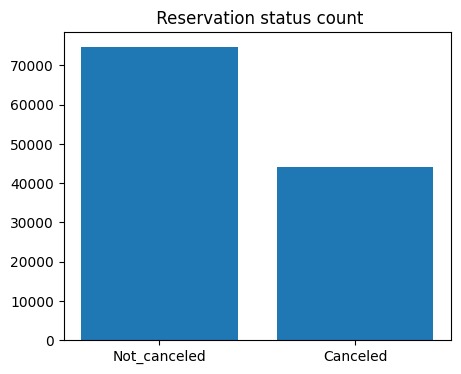

In [24]:
print(cancelled_per)
plt.figure(figsize = (5,4))
plt.title(" Reservation status count")
plt.bar(['Not_canceled', 'Canceled'], df['is_canceled'].value_counts())
plt.show()

till now we got % canceled....now we will see which of the hotel's cancelation is more

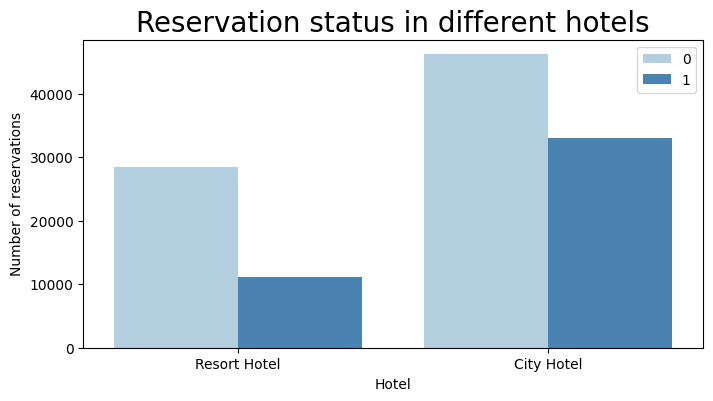

In [26]:
plt.figure(figsize= (8,4)) # size of figure
ax1 = sns.countplot(x='hotel', hue = 'is_canceled' , data = df , palette = 'Blues') # hue means wrt which we are doing the counting
legends_labels , _ = ax1.get_legend_handles_labels()
ax1.legend(bbox_to_anchor = (1,1))
plt.title("Reservation status in different hotels" , size = 20)
plt.xlabel('Hotel')
plt.ylabel('Number of reservations')
plt.show()

insight we can draw from here is that even tho price of resort hotels more still cancelation ratio less compared to city hotels.. so might be other factor like waiting the customer or city hotel has some other lack in facilities..let's find it

In [28]:
resort_hotel = df[df['hotel'] =='Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.72025
1,0.27975


In [29]:
city_hotel = df[df['hotel'] =='City Hotel']
city_hotel['is_canceled'].value_counts(normalize=True)

,proportion
is_canceled,
0,0.582918
1,0.417082


now we'll check if price has an impact on this cancelation

In [30]:
# we'll perform a groupby of reservation_status_date and adr ie average daily rate which means the average price per day of the hotel ... we'll find mean of it
resort_hotel = resort_hotel.groupby('reservation_status_date')['adr'].mean()
city_hotel = city_hotel.groupby('reservation_status_date')['adr'].mean()

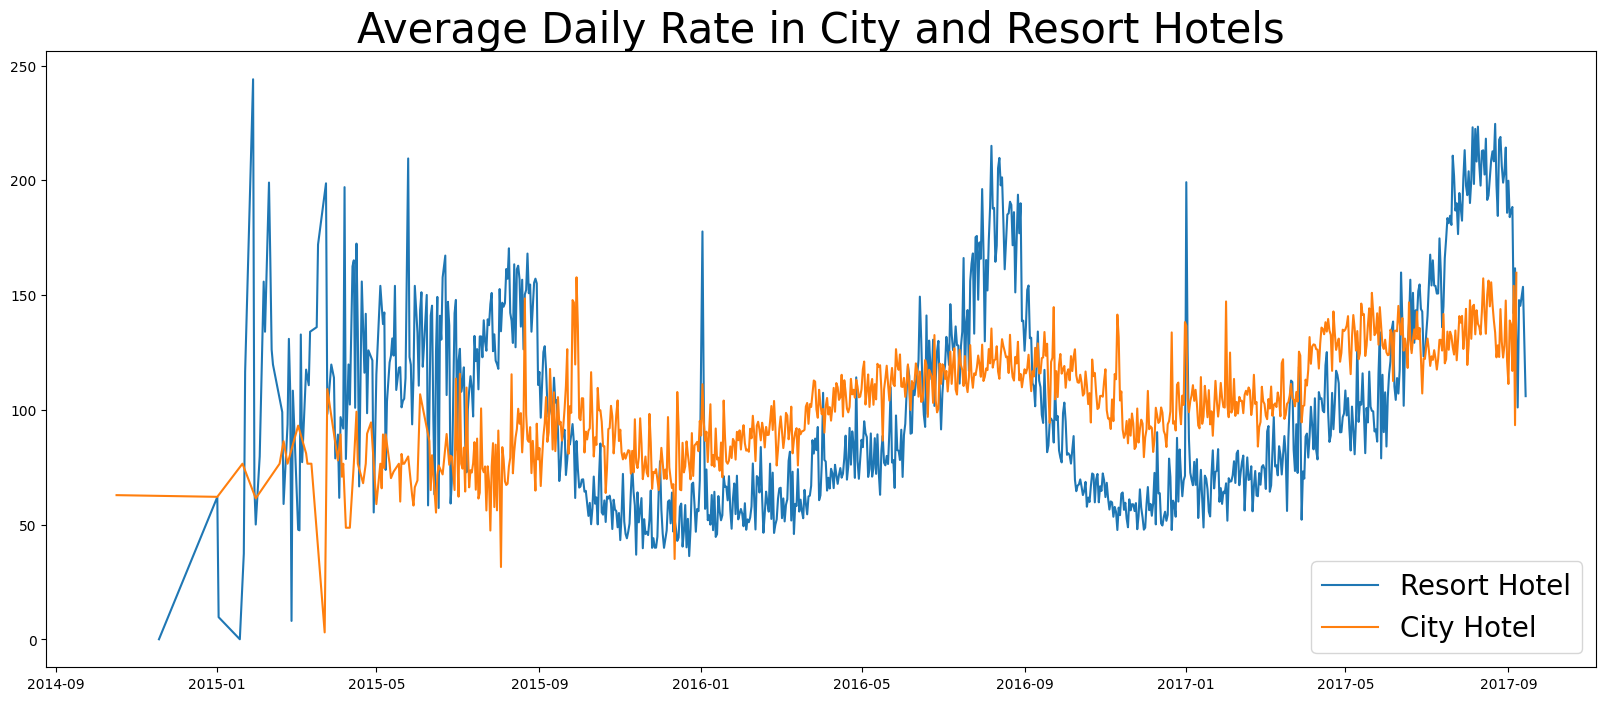

In [31]:
plt.figure(figsize=(20,8))
plt.title('Average Daily Rate in City and Resort Hotels', fontsize = 30)
plt.plot(resort_hotel.index, resort_hotel, label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel, label = 'City Hotel')
plt.legend(fontsize = 20)
plt.show()


our one hypothesis is true that price of resort hotel greater than  city hotels ....now we'll check in which month max reservation takes place and in which month max cancelletion takes place

on months with need a bar chart on canceled and not canceled

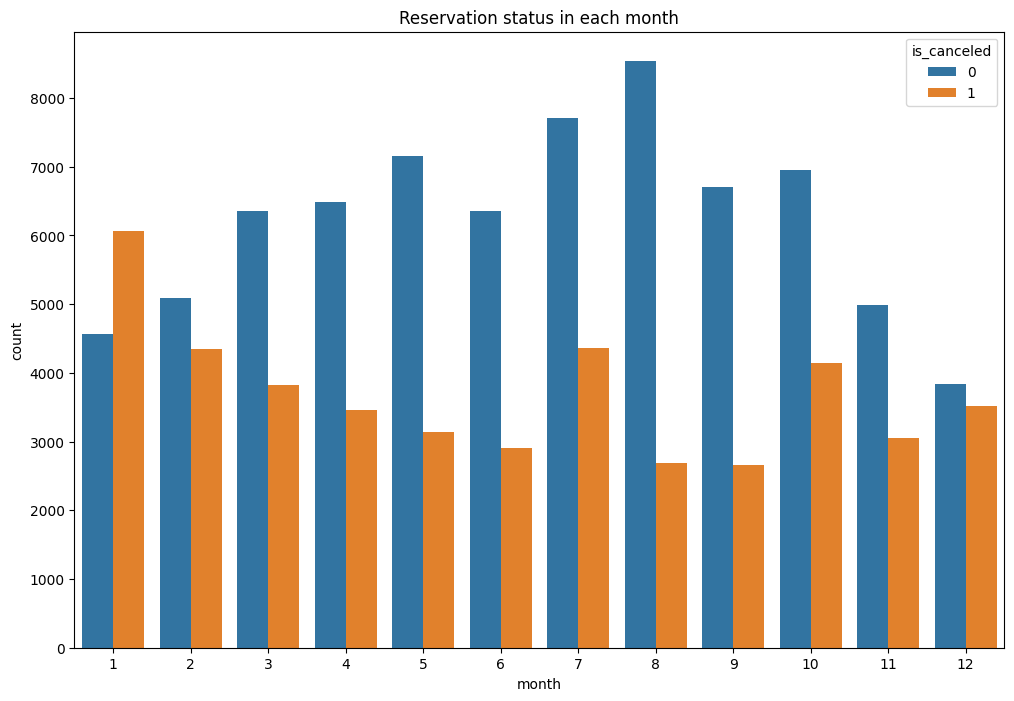

In [33]:
df['month'] = df['reservation_status_date'].dt.month # creating a new column month.....dt.month returns all the months
plt.figure(figsize = (12,8))
ax1 = sns.countplot(data = df , x = 'month' , hue = 'is_canceled')
plt.title('Reservation status in each month')
plt.show()

data we got is bit confusing as the max reservation is on august and september  when least cancellation took place.....on january max cancellation took place and reservation was higher too...  so let's see the monthly prices comparing average daily price for each months

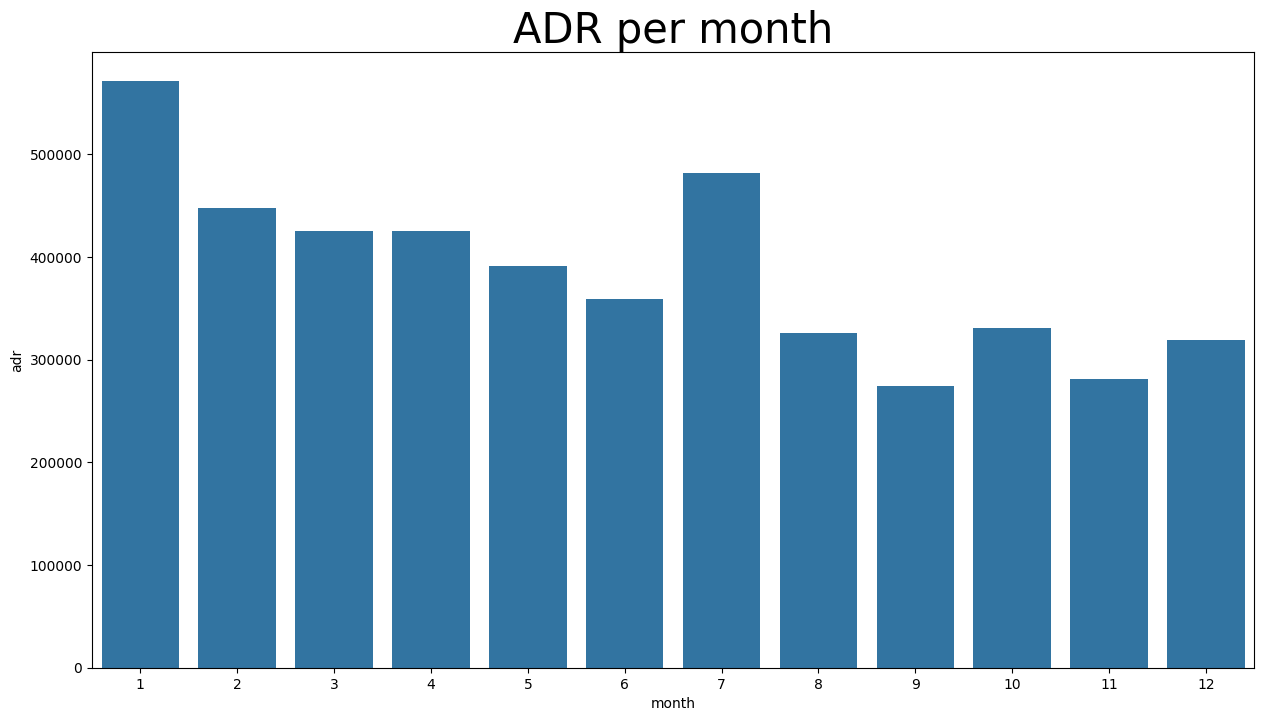

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15,8))
plt.title('ADR per month', fontsize=30)
sns.barplot(x='month', y='adr',
            data=df[df['is_canceled']==1].groupby('month')[['adr']].sum().reset_index())
plt.show()


from here we can see prices were low during august and september --> least cancellation and most reservation

on january --> high price --> more cancelation and least reservation

We'll see now does based on diff people of diff country canceletion differs or not and also the reservation

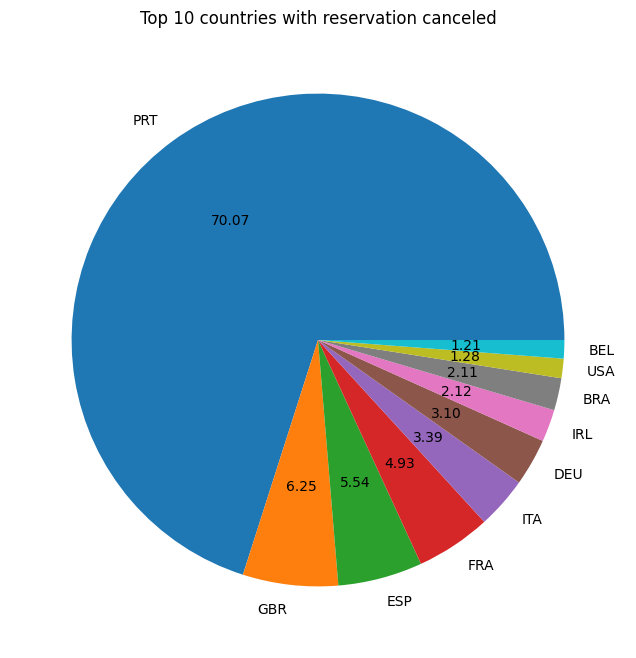

In [39]:
# we will work with top 10 countries
cancelled_data = df[df['is_canceled'] == 1]
top_10_country = cancelled_data['country'].value_counts()[:10]

plt.figure(figsize=(8,8))
plt.title("Top 10 countries with reservation canceled")
plt.pie(top_10_country, autopct="%.2f", labels=top_10_country.index)
plt.show()


insight we can get from here is that company should increase the fascilities at portugal or fx prices and focus on marketing to attract more customers as there cancelation rate is higher

In [40]:
# we'll check now if the client's were online or offline
df['market_segment'].value_counts()

,count
market_segment,
Online TA,56402
Offline TA/TO,24159
Groups,19806
Direct,12448
Corporate,5111
Complementary,734
Aviation,237


In [42]:
# we'll check now if the client's were online or offline
df['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.474377
Offline TA/TO,0.203193
Groups,0.166581
Direct,0.104696
Corporate,0.042987
Complementary,0.006173
Aviation,0.001993


here our hypothesis turn out to be false as we thought offline customers were more

let's now see among these customers who did most cancellations

In [43]:
cancelled_data['market_segment'].value_counts(normalize = True)

,proportion
market_segment,
Online TA,0.469696
Groups,0.273985
Offline TA/TO,0.187466
Direct,0.043486
Corporate,0.022151
Complementary,0.002038
Aviation,0.001178


insight could be drawn here is that , in online maybe it looks good but in offline not so hotels should focus on being transparent online as well

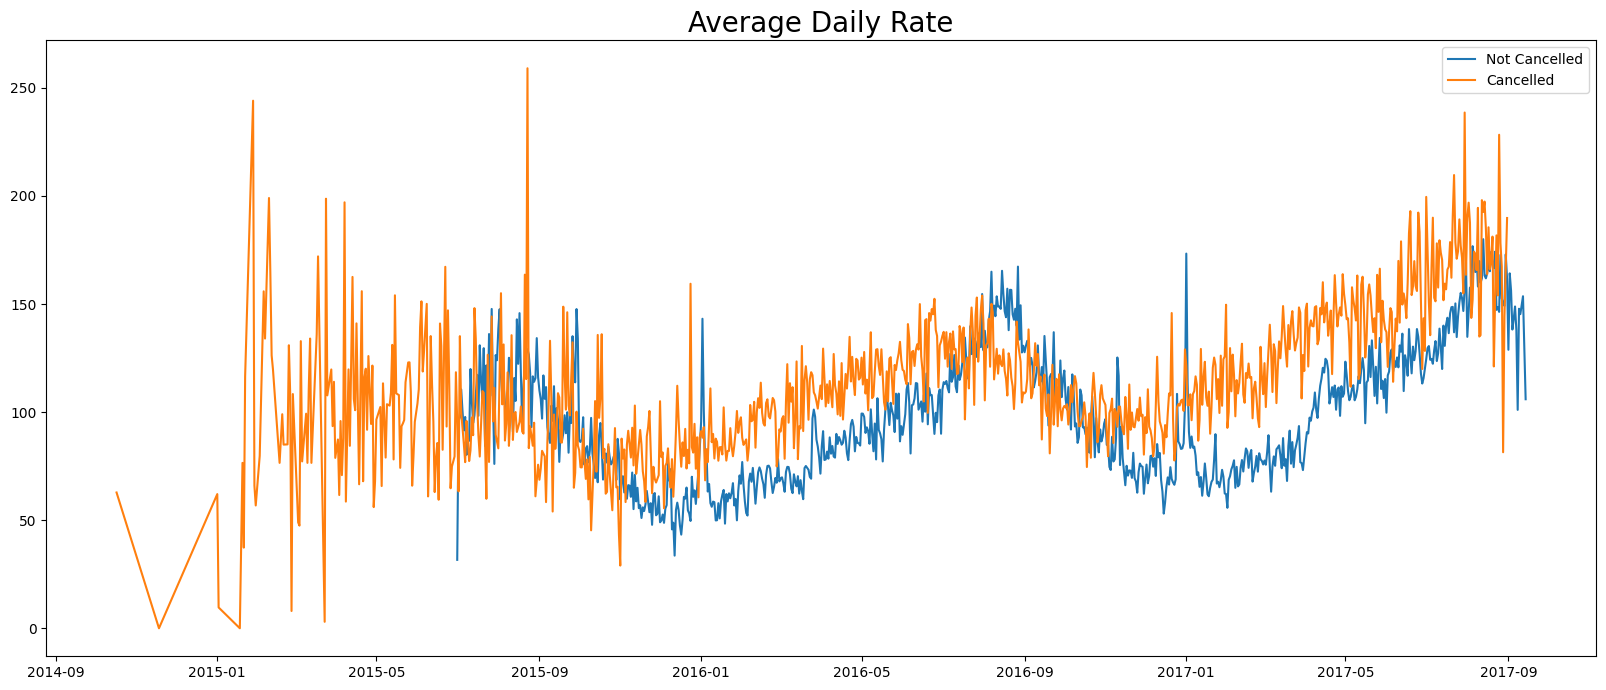

In [44]:
# we'll check if adr is more for cancelled reservation or uncancelled reservation
# Average Daily Rate (ADR) for cancelled reservations
cancelled_df_adr = cancelled_data.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace=True)
cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Average Daily Rate (ADR) for not cancelled reservations
not_cancelled_data = df[df['is_canceled'] == 0]
not_cancelled_df_adr = not_cancelled_data.groupby('reservation_status_date')[['adr']].mean()
not_cancelled_df_adr.reset_index(inplace=True)
not_cancelled_df_adr.sort_values('reservation_status_date', inplace=True)

# Plotting
plt.figure(figsize=(20, 8))
plt.title("Average Daily Rate", fontsize=20)

plt.plot(not_cancelled_df_adr['reservation_status_date'],
         not_cancelled_df_adr['adr'],
         label='Not Cancelled')

plt.plot(cancelled_df_adr['reservation_status_date'],
         cancelled_df_adr['adr'],
         label='Cancelled')

plt.legend()
plt.show()


as data contains inconsistency coz of lack of data so we'll consider the part of data where it is consistent

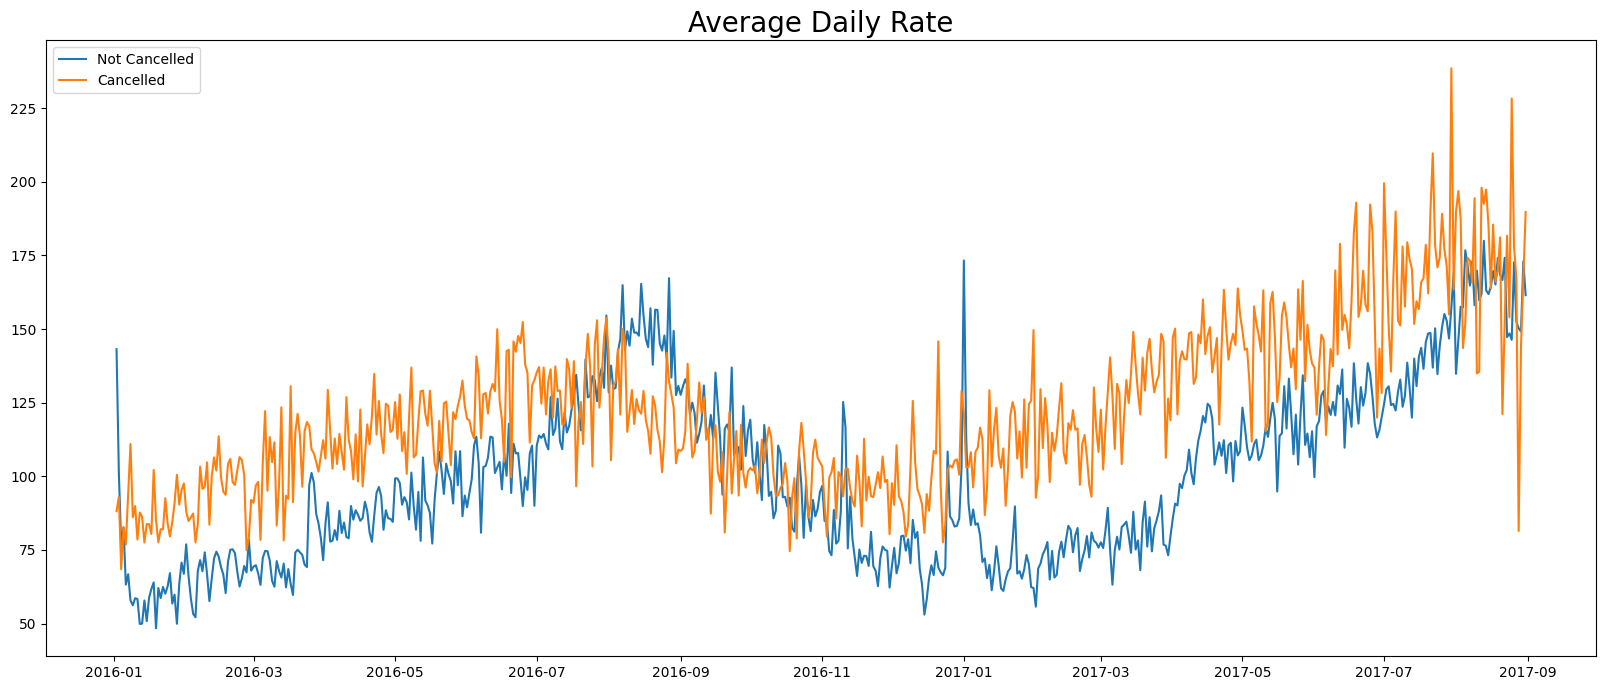

In [45]:
# Filter ADR values for cancelled reservations after 2016
cancelled_df_adr = cancelled_df_adr[
    (cancelled_df_adr['reservation_status_date'] > '2016') &
    (cancelled_df_adr['reservation_status_date'] < '2017-09')
]

# Filter ADR values for not cancelled reservations after 2016
not_cancelled_df_adr = not_cancelled_df_adr[
    (not_cancelled_df_adr['reservation_status_date'] > '2016') &
    (not_cancelled_df_adr['reservation_status_date'] < '2017-09')
]

# Plotting ADR trends
plt.figure(figsize=(20, 8))
plt.title("Average Daily Rate", fontsize=20)

plt.plot(not_cancelled_df_adr['reservation_status_date'],
         not_cancelled_df_adr['adr'],
         label='Not Cancelled')

plt.plot(cancelled_df_adr['reservation_status_date'],
         cancelled_df_adr['adr'],
         label='Cancelled')

plt.legend()
plt.show()


average daily rate affects the cancellation here we can clearly see also!